In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def write_str_answer(answer, file_name):
    with open(file_name, "w") as fout:
        fout.write(str(answer))

#### Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits). 

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

In [3]:
digits = load_digits()

Target: 0


<Figure size 432x288 with 0 Axes>

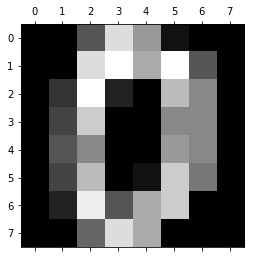

In [4]:
print('Target:',digits.target[0])

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [5]:
X = digits.data
y = digits.target

#### 1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [6]:
tree_clf = DecisionTreeClassifier()
val_score = cross_val_score(tree_clf, X, y, cv=10).mean()

print(val_score)
write_str_answer(val_score, 'submission1.txt')

0.8330353817504654


Качество работы одного решающего дерева обычно получается не очень высоким, но на этом датасете получилось неплохо. Обратите внимание - дерево вполне могло получиться сильно переобученным, ведь мы не ограничивали его глубину.

#### 2. Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [7]:
bagg_clf = BaggingClassifier(n_estimators=100)
bagg_clf.fit(X, y)

bagg_val_score = cross_val_score(bagg_clf, X, y, cv=10).mean()

print(bagg_val_score)
write_str_answer(bagg_val_score, 'submission2.txt')

0.9253817504655494


Деревья неустойчивы к изменениям в обучающей выборке, поэтому в результате усреднения по деревьям, построенным на немного разных выборках (как это происходит в бэггинге), получается более точный ответ.

####  3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [8]:
d = X.shape[1]

bagg_clf_q = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(d)))
bagg_clf_q.fit(X, y)

bagg_q_val_score = cross_val_score(bagg_clf_q, X, y, cv=10).mean()

print(bagg_q_val_score)
write_str_answer(bagg_q_val_score, 'submission3.txt')

0.9343513345747981


С добавлением выбора случайных признаков деревья стали различаться еще больше, в результате композиция работает лучше.

#### 4. Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [9]:
tree_clf_q = DecisionTreeClassifier(max_features=int(np.sqrt(d)))
bagg_clf_q = BaggingClassifier(tree_clf_q, n_estimators=100)

bagg_clf_q.fit(X, y)

bagg_q_val_score = cross_val_score(bagg_clf_q, X, y, cv=10).mean()

print(bagg_q_val_score)
write_str_answer(bagg_q_val_score, 'submission4.txt')

0.9488019863438858


#### 5. Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. 

In [10]:
rand_forest_clf = RandomForestClassifier(max_features='sqrt', n_estimators=100)
rand_forest_clf.fit(X, y)

rand_for_val_score = cross_val_score(rand_forest_clf, X, y, cv=10).mean()
print(rand_for_val_score)

0.9527032898820608


На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

Score for n_estimators=0: nan
Score for n_estimators=10: 0.9254065797641216
Score for n_estimators=20: 0.9443420235878335
Score for n_estimators=30: 0.9476846679081316
Score for n_estimators=40: 0.9471260086902544
Score for n_estimators=50: 0.947687771570453
Score for n_estimators=60: 0.9426877715704529
Score for n_estimators=70: 0.9471384233395407
Score for n_estimators=80: 0.9471260086902544
Score for n_estimators=90: 0.9510180012414648


Text(0,0.5,'score')

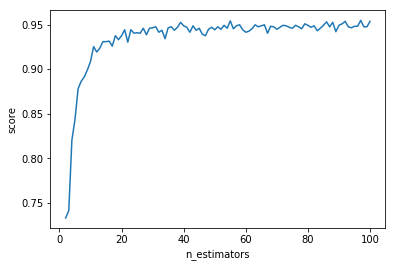

In [11]:
# 2, 3:
n_estimators = np.arange(1, 101, 1)
scores = []

for i in range(len(n_estimators)):
    rand_forest_clf = RandomForestClassifier(max_features='sqrt', n_estimators=i)
    rand_for_val_score = cross_val_score(rand_forest_clf, X, y, cv=10).mean()
    scores.append(rand_for_val_score)
    if i % 10 == 0:
        print(f'Score for n_estimators={i}: {rand_for_val_score}')


plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')

Score for n_features=10: 0.9510273122284294
Score for n_features=20: 0.9448944754810675
Score for n_features=30: 0.9393171942892613
Score for n_features=40: 0.9326350093109868
Score for n_features=50: 0.9343078833022966
Score for n_features=60: 0.9287368094351335


Text(0,0.5,'score')

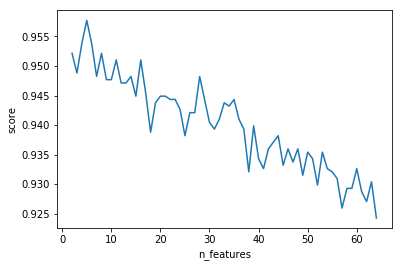

In [12]:
# 4, 5:
n_features = np.arange(1, 65, 1)
scores = []

for i in range(len(n_features)):
    rand_forest_clf = RandomForestClassifier(max_features=i, n_estimators=100)
    rand_for_val_score = cross_val_score(rand_forest_clf, X, y, cv=10).mean()
    scores.append(rand_for_val_score)
    if i > 1 and i % 10 == 0:
        print(f'Score for n_features={i}: {rand_for_val_score}')


plt.plot(n_features, scores)
plt.xlabel('n_features')
plt.ylabel('score')

Score for max_depth=1: 0.6899627560521415
Score for max_depth=2: 0.7879795158286778
Score for max_depth=3: 0.8569615145872129
Score for max_depth=4: 0.8803320918684048
Score for max_depth=5: 0.9142830540037246
Score for max_depth=6: 0.9242954686530105
Score for max_depth=7: 0.9370949720670391
Score for max_depth=8: 0.9404376163873369
Score for max_depth=9: 0.9465611421477342


Text(0,0.5,'score')

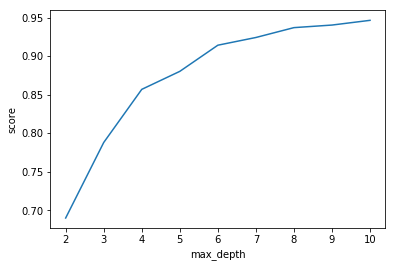

In [13]:
# 6, 7:
max_depth = np.arange(1, 11, 1)
scores = []

for i in range(len(max_depth)):
    rand_forest_clf = RandomForestClassifier(max_depth=i, n_estimators=100)
    rand_for_val_score = cross_val_score(rand_forest_clf, X, y, cv=10).mean()
    scores.append(rand_for_val_score)
    if i > 0:
        print(f'Score for max_depth={i}: {rand_for_val_score}')


plt.plot(max_depth, scores)
plt.xlabel('max_depth')
plt.ylabel('score')

In [14]:
write_str_answer('2 3 4 7', 'submission5.txt')